In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/data_render/nCoV_data_render.csv'
data = pd.read_csv(path)
data["Date"] = pd.to_datetime(data["Date"])
index_data = data.set_index(["Date"], drop=True)

# Check data
index_data.head(20)

,Total cases
Date,
2020-01-28,6061
2020-01-29,7816
2020-01-30,9821
2020-01-31,11948
2020-02-01,14551
2020-02-02,17387
2020-02-03,20047
2020-02-04,24553
2020-02-05,28276


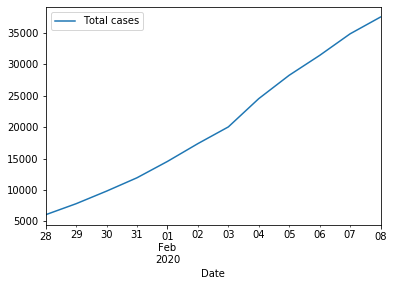

In [3]:
df = index_data[["Total cases"]]
df.plot()

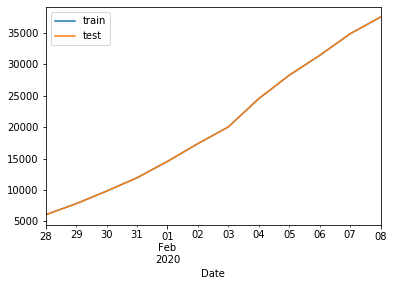

In [4]:
# Split data
split_date = pd.Timestamp('2020-02-08')
split_date2 = pd.Timestamp('2020-01-28')

train = df.loc[:split_date]
test = df.loc[split_date2:]

# Plot splitted data
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [5]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
train_scale = scale.fit_transform(train)
test_scale = scale.transform(test)

In [6]:
# Split data into x and y
X_train = train_scale[:-1]
y_train = train_scale[1:]

X_test = test_scale[:-1]
y_test = test_scale[1:]

In [7]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

Using TensorFlow backend.


In [41]:
K.clear_session()

model = Sequential()
model.add(Dense(15, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer ='adam')
early_stop = EarlyStopping(monitor ='loss', patience=15, verbose=1)
history = model.fit(X_train, y_train, epochs=250, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/250
11/11 [==============================] - 0s 7ms/step - loss: 0.3817
Epoch 2/250
11/11 [==============================] - 0s 744us/step - loss: 0.3384
Epoch 3/250
11/11 [==============================] - 0s 811us/step - loss: 0.2988
Epoch 4/250
11/11 [==============================] - 0s 830us/step - loss: 0.2624
Epoch 5/250
11/11 [==============================] - 0s 761us/step - loss: 0.2293
Epoch 6/250
11/11 [==============================] - 0s 896us/step - loss: 0.1994
Epoch 7/250
11/11 [==============================] - 0s 862us/step - loss: 0.1726
Epoch 8/250
11/11 [==============================] - 0s 799us/step - loss: 0.1488
Epoch 9/250
11/11 [==============================] - 0s 825us/step - loss: 0.1280
Epoch 10/250
11/11 [==============================] - 0s 770us/step - loss: 0.1099
Epoch 11/250
11/11 [==============================] - 0s 787us/step - loss: 0.0946
Epoch 12/250
11/11 [==============================] - 0s 796us/step - loss: 0.0817
Epoch 13/250
11

11/11 [==============================] - 0s 776us/step - loss: 5.6042e-04
Epoch 100/250
11/11 [==============================] - 0s 678us/step - loss: 5.2958e-04
Epoch 101/250
11/11 [==============================] - 0s 771us/step - loss: 5.0091e-04
Epoch 102/250
11/11 [==============================] - 0s 750us/step - loss: 4.7548e-04
Epoch 103/250
11/11 [==============================] - 0s 622us/step - loss: 4.5207e-04
Epoch 104/250
11/11 [==============================] - 0s 718us/step - loss: 4.3065e-04
Epoch 105/250
11/11 [==============================] - 0s 642us/step - loss: 4.1084e-04
Epoch 106/250
11/11 [==============================] - 0s 740us/step - loss: 3.9349e-04
Epoch 107/250
11/11 [==============================] - 0s 630us/step - loss: 3.7757e-04
Epoch 108/250
11/11 [==============================] - 0s 715us/step - loss: 3.6305e-04
Epoch 109/250
11/11 [==============================] - 0s 689us/step - loss: 3.4989e-04
Epoch 110/250
11/11 [=========================

11/11 [==============================] - 0s 753us/step - loss: 2.1725e-04
Epoch 193/250
11/11 [==============================] - 0s 723us/step - loss: 2.1696e-04
Epoch 194/250
11/11 [==============================] - 0s 783us/step - loss: 2.1667e-04
Epoch 195/250
11/11 [==============================] - 0s 700us/step - loss: 2.1638e-04
Epoch 196/250
11/11 [==============================] - 0s 731us/step - loss: 2.1610e-04
Epoch 197/250
11/11 [==============================] - 0s 730us/step - loss: 2.1581e-04
Epoch 198/250
11/11 [==============================] - 0s 684us/step - loss: 2.1552e-04
Epoch 199/250
11/11 [==============================] - 0s 720us/step - loss: 2.1524e-04
Epoch 200/250
11/11 [==============================] - 0s 688us/step - loss: 2.1495e-04
Epoch 201/250
11/11 [==============================] - 0s 715us/step - loss: 2.1467e-04
Epoch 202/250
11/11 [==============================] - 0s 699us/step - loss: 2.1438e-04
Epoch 203/250
11/11 [=========================

In [42]:
# Prediction
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)

In [43]:
# Save model
model.save('ANN_nCoV.h5')

In [44]:
model_ann = load_model('ANN_nCoV.h5')
y_pred_test_ANN = model_ann.predict(X_test)

In [45]:
# Save data
col1 = pd.DataFrame(y_test, columns=['True'])
col2 = pd.DataFrame(y_pred_test_ANN, columns=['ANN Prediction'])
col3 = pd.DataFrame(history.history['loss'], columns=['Loss_ANN'])

results = pd.concat([col1, col2, col3], axis=1)
results.to_csv('ANN_abc.csv')

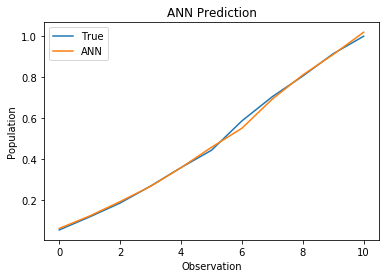

In [46]:
# Graphing
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN Prediction")
plt.xlabel('Observation')
plt.ylabel('Population')
plt.legend()
plt.show()

In [47]:
# R2 score
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# MAPE
def MAPE(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return (np.mean(np.abs((y - y_pred) / y)) * 100)

In [48]:
from sklearn.metrics import r2_score
# Scoring
score_ann = model_ann.evaluate(X_test, y_test, batch_size=1)
print('ANN: %f'%score_ann)

# MAPE 
print("MAPE score is: " + str(MAPE(y_test, y_pred_test_ANN)))

# R2 Scores
print("The R2 score on the Train set is:\t{:0.9f}".format(r2_score(y_train, y_train_pred_ann)))
r2_train = r2_score(y_train, y_train_pred_ann)
print("The Adjusted R2 score on the Train set is:\t{:0.9f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.9f}".format(r2_score(y_test, y_pred_test_ann)))
r2_test = r2_score(y_test, y_pred_test_ann)
print("The Adjusted R2 score on the Test set is:\t{:0.9f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

11/11 [==============================] - 0s 1ms/step
ANN: 0.000197
MAPE score is: 3.187890926003392
The R2 score on the Train set is:	0.997998416
The Adjusted R2 score on the Train set is:	0.997776018

The R2 score on the Test set is:	0.997998416
The Adjusted R2 score on the Test set is:	0.997776018
